In [1]:
import pandas as pd
df = pd.read_csv('Mall_customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Assesing Data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Check missing values

In [3]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Check duplicated data

In [4]:
print('Duplicated data = ' , end='')
print(df.duplicated().sum())

Duplicated data = 0


### Cleaning data

In [5]:
df = df.rename(columns={'Genre':'gender',
                        'Age':'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)':'spending_score'})
df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [6]:
df['gender'].replace(['Male','Female'], [0,1], inplace=True)
df.head()

,CustomerID,gender,age,annual_income,spending_score
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [7]:
from sklearn.cluster import KMeans

X = df.drop(['CustomerID', 'gender'], axis=1)

In [8]:
X.head()

,age,annual_income,spending_score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


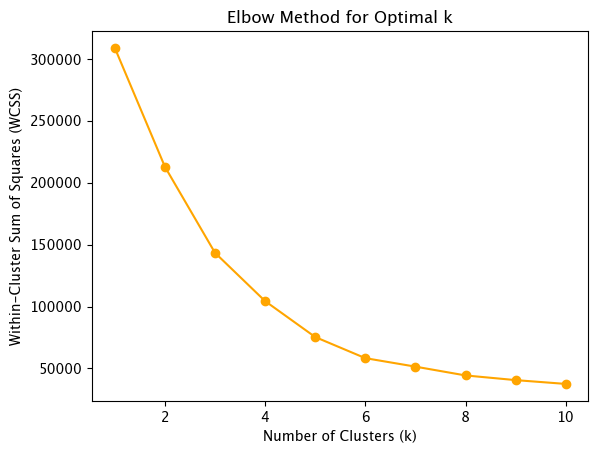

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

clusters = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, n_init=10).fit(X)
    clusters.append(km.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), clusters, marker='o', linestyle='-', color='orange')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


In [10]:
km5 = KMeans(n_clusters=5, n_init=10).fit(X)

In [11]:
X['Labels'] = km5.labels_

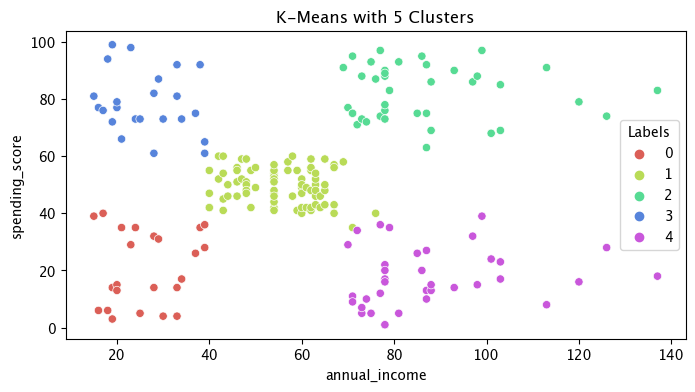

In [12]:
import seaborn as sns

plt.figure(figsize=(8, 4))

sns.scatterplot(x=X['annual_income'], y=X['spending_score'], hue=X['Labels'], palette=sns.color_palette('hls',5))

plt.title('K-Means with 5 Clusters')
plt.show()
